In [35]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from wordcloud import WordCloud

In [38]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DSL-189\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
structured_data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5],
    'Age': [34, 45, 23, 50, 40],
    'Gender': ['M', 'F', 'F', 'M', 'M'],
    'Diagnosis': ['Diabetes', 'Hypertension', 'Asthma', 'Diabetes','Hypertension']
})
structured_data.head()

,PatientID,Age,Gender,Diagnosis
0,1,34,M,Diabetes
1,2,45,F,Hypertension
2,3,23,F,Asthma
3,4,50,M,Diabetes
4,5,40,M,Hypertension


In [40]:
unstructured_data = ["Patient has a history of hypertension and diabetes. Prescribed medication X.",
                     "Asthma diagnosis confirmed. Patient advised to use inhaler daily.",
                     "Hypertension patient. Needs regular monitoring of blood pressure.",
                     "Diabetes patient. Recommended diet and exercise.",
                     "Patient diagnosed with hypertension. Medication Y prescribed."]

In [41]:
structured_data.isnull().sum()

PatientID    0
Age          0
Gender       0
Diagnosis    0
dtype: int64

In [42]:
structured_data['Gender'] = structured_data['Gender'].map({'M': 0, 'F':1})
print(structured_data.head())

   PatientID  Age  Gender     Diagnosis
0          1   34       0      Diabetes
1          2   45       1  Hypertension
2          3   23       1        Asthma
3          4   50       0      Diabetes
4          5   40       0  Hypertension


In [43]:
structured_data = pd.get_dummies(structured_data, columns=['Diagnosis'])
structured_data.head()

,PatientID,Age,Gender,Diagnosis_Asthma,Diagnosis_Diabetes,Diagnosis_Hypertension
0,1,34,0,False,True,False
1,2,45,1,False,False,True
2,3,23,1,True,False,False
3,4,50,0,False,True,False
4,5,40,0,False,False,True


In [44]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W+', ' ', text)
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

In [51]:
cleaned_notes = [preprocess_text(note) for note in unstructured_data]
print(cleaned_notes)

['patient history hypertension diabetes prescribed medication x', 'asthma diagnosis confirmed patient advised use inhaler daily', 'hypertension patient needs regular monitoring blood pressure', 'diabetes patient recommended diet exercise', 'patient diagnosed hypertension medication prescribed']


In [46]:
vectorizer = TfidfVectorizer(max_features=10)
X_tfidf = vectorizer.fit_transform(cleaned_notes).toarray()

pd.DataFrame(X_tfidf, columns=vectorizer.get_feature_names_out()).head()

,advised,diabetes,hypertension,medication,monitoring,needs,patient,prescribed,pressure,recommended
0,0.00000,0.497649,0.413094,0.497649,0.0000,0.0000,0.293920,0.497649,0.0000,0.000000
1,0.90275,0.000000,0.000000,0.000000,0.0000,0.0000,0.430165,0.000000,0.0000,0.000000
2,0.00000,0.000000,0.349322,0.000000,0.5216,0.5216,0.248545,0.000000,0.5216,0.000000
3,0.00000,0.588732,0.000000,0.000000,0.0000,0.0000,0.347715,0.000000,0.0000,0.729718
4,0.00000,0.000000,0.476256,0.573740,0.0000,0.0000,0.338860,0.573740,0.0000,0.000000


In [47]:
pca = PCA(n_components=2)
structured_data_pca = pca.fit_transform(structured_data.drop('PatientID', axis=1))

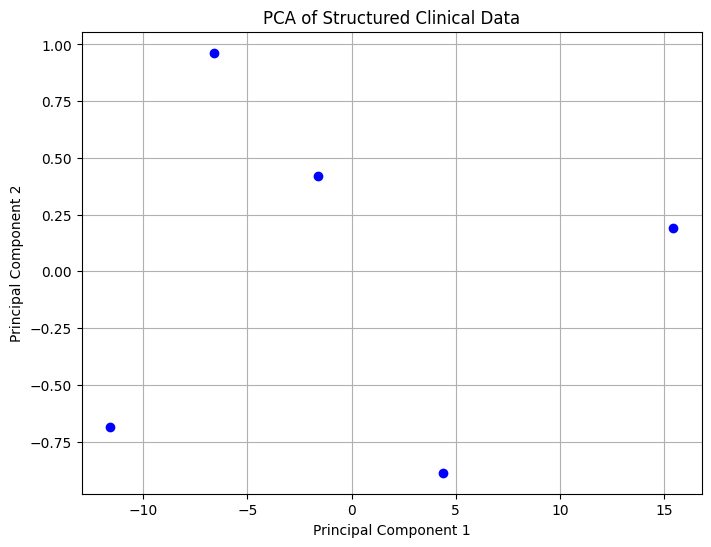

In [48]:
plt.figure(figsize=(8, 6))

plt.scatter(structured_data_pca[:, 0], structured_data_pca[:, 1], c= 'blue', marker='o')
plt.title('PCA of Structured Clinical Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [49]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_tfidf)

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


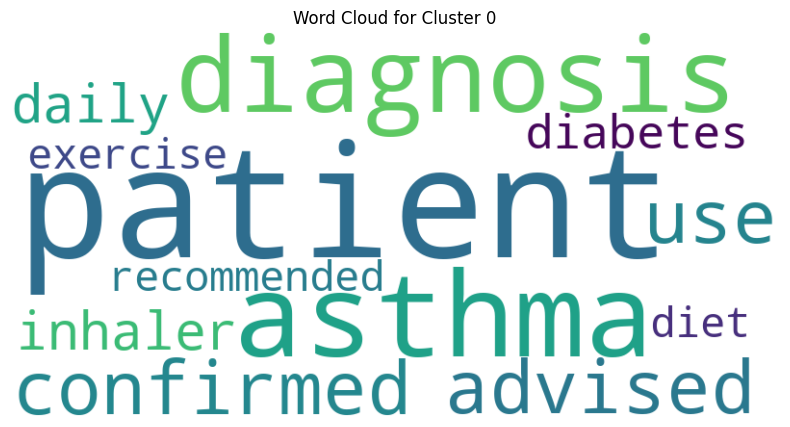

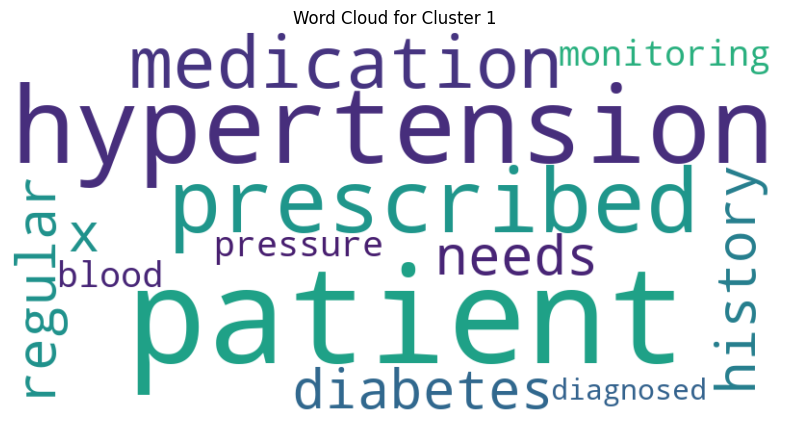

In [50]:
for i in range(2):
    cluster_words = ' '.join([cleaned_notes[j] for j in range(len(cleaned_notes)) if kmeans.labels_[j] == i])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {i}')
    plt.show()